In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.shape

(10000, 20)

In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH)
train_df.shape[1] - 1 == test_df.shape[1]

True

In [5]:
custom_feature_names = []
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


# Функции

Вывод графиков

In [6]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize = (18, 10))
    
    plt.subplot(121)
    sns.scatterplot(x = train_pred_values, y = train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x = test_pred_values, y = test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Преобразование для значения признака "HouseYear"

In [7]:
def parse_year(year):
    res = year % 10000
    if res > 2020:
        res %= 1000
        res += 1000 if res > 20 else 0
    return res

## Подготовка данных

Признаки Rooms/HouseFloor должны представлять из себя целые числа

In [8]:
train_df['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [9]:
for df in [train_df, test_df]: 
    for i in ['Rooms', 'HouseFloor']:
        df[i] = df[i].astype('int64')

In [10]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Замена значения признаков с типом `object`

In [11]:
categorial_columns = [c for c in train_df.columns if train_df[c].dtype.name == 'object']
for c in categorial_columns:
    print(train_df[c].value_counts(dropna = False))    

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


In [12]:
for df in [train_df, test_df]:
    for c in categorial_columns:
        df[c] = df[c].replace({'A':0, 'B':1})
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


Замена невалидных значений признака `Rooms`

In [13]:
train_df['Rooms'].unique()

array([ 2,  3,  1,  4, 10,  0,  5, 19,  6], dtype=int64)

In [14]:
for df in [train_df, test_df]:
    df.loc[df['Rooms'].isin([0, 10, 19]), 'Rooms'] = df['Rooms'].mode()[0]

Замена пропущенного признака `Square` на медиану

In [15]:
train_df['LifeSquare'].isnull().sum()

2113

In [16]:
for df in [train_df, test_df]:
    df['LifeSquare'].fillna(df['LifeSquare'].median(), inplace = True)

Отбросить выбросы по площади признаки (`Square`/`LifeSquare`/`KitchenSquare`) у `train_df`

In [17]:
square_outliers = train_df[train_df['Square'] < (train_df['KitchenSquare'] + train_df['LifeSquare'])].index
train_df.loc[square_outliers, 'Square'] = train_df['KitchenSquare'] + train_df['LifeSquare']

for c in ['Square', 'LifeSquare', 'KitchenSquare']: 
    train_df = train_df[(train_df[c] < train_df[c].quantile(.99)) &
                    (train_df[c] > train_df[c].quantile(.01))]

Выбросы по этажности дома

In [18]:
for df in [train_df, test_df]: 
    house_floor_outliers = df[df['HouseFloor'] == 0].index
    df.loc[house_floor_outliers, 'HouseFloor'] = df['Floor']

Выбросы по этажам, где размещается квартира

In [19]:
for df in [train_df, test_df]:
    floor_outliers = df[df['HouseFloor'] < df['Floor']].index
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(
        lambda x: random.randint(1, x)
    )

train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
3,5809,58,2,61.731512,52.731512,9.0,8,17,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
5,12915,59,3,80.384479,46.683720,12.0,5,17,2011,0.309479,1,1,35,7715,4,990.0,0,6,1,215898.447742


Подготовка признака `HouseYear`

In [20]:
train_df['HouseYear'].sort_values(ascending = False)

1497    20052011
4189        4968
3485        2020
4493        2020
4053        2020
          ...   
1380        1917
8144        1917
5053        1917
7611        1916
910         1914
Name: HouseYear, Length: 8849, dtype: int64

In [21]:
for df in [train_df, test_df]:
    house_year_outliers = df['HouseYear'] > 2020
    df.loc[house_year_outliers, 'HouseYear'] = df.loc[house_year_outliers, 'HouseYear'].apply(parse_year)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
3,5809,58,2,61.731512,52.731512,9.0,8,17,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
5,12915,59,3,80.384479,46.683720,12.0,5,17,2011,0.309479,1,1,35,7715,4,990.0,0,6,1,215898.447742


Замена пропущенных значений признака `Healthcare_1` на медиану

In [22]:
for df in [train_df, test_df]:
    df['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace = True)

In [23]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,900.0,0,0,1
1,15856,74,2,69.263183,32.925087,1.0,1,1,1977,0.075779,1,1,6,1437,3,900.0,0,2,1
2,5480,190,1,13.597819,15.948246,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,900.0,3,3,1
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,900.0,0,0,0


Создание нового признака `MedPriceByDistrictAndHouseYear` (средняя цена в района с учетом года постройки дома)

In [24]:
med_price_by_district_and_house_year = train_df.groupby(['DistrictId', 'HouseYear'], as_index = False)\
                        .agg({'Price':'median'})\
                        .rename(columns = {'Price':'MedPriceByDistrictAndHouseYear'})
train_df = train_df.merge(med_price_by_district_and_house_year, on = ['DistrictId', 'HouseYear'], how = 'left')

test_df.merge(med_price_by_district_and_house_year, on = ['DistrictId', 'HouseYear'], how = 'left')

custom_feature_names.append('MedPriceByDistrictAndHouseYear')

Новый признак величины района

In [25]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
           .rename(columns = {'index':'DistrictId', 'DistrictId':'DistrictSize'})

train_df = train_df.merge(district_size, on = 'DistrictId', how = 'left')
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

district_size = test_df['DistrictId'].value_counts().reset_index()\
               .rename(columns = {'index':'DistrictId', 'DistrictId':'DistrictSize'})

test_df = test_df.merge(district_size, on = 'DistrictId', how = 'left')
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)
custom_feature_names.append('IsDistrictLarge')

### Подготовка модели

In [26]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']
target_name = 'Price'
total_feature_names = feature_names + custom_feature_names
X = train_df[total_feature_names]
y = train_df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Применение модели к тренировочным данным

Train R2:	0.826
Test R2:	0.802


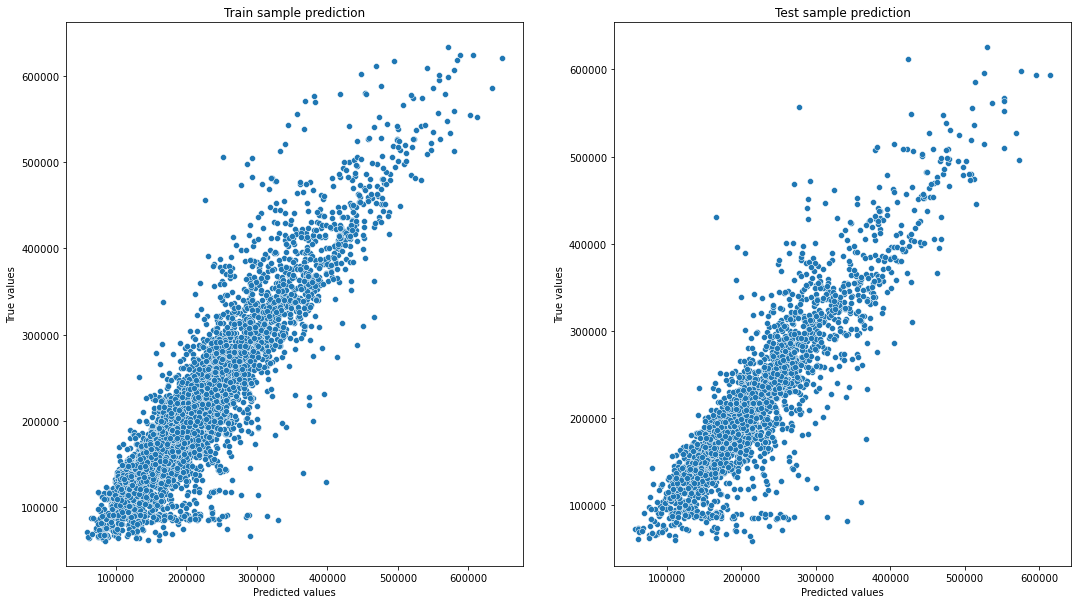

In [27]:
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

<AxesSubplot:>

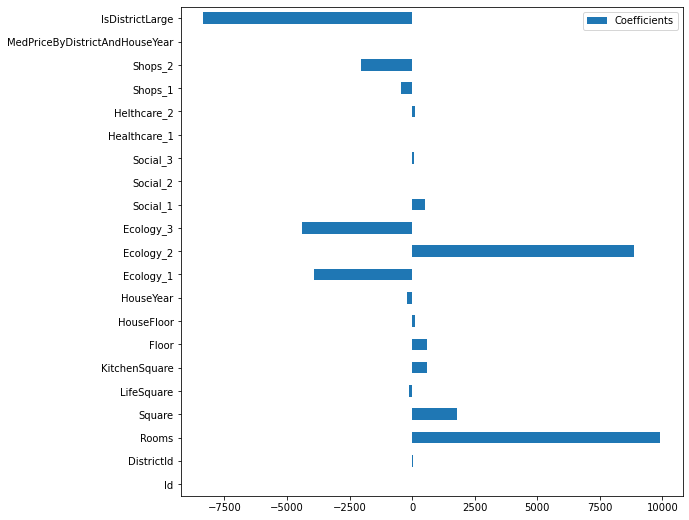

In [28]:
coefs = pd.DataFrame(
    lr.coef_,
    columns = ['Coefficients'], index = total_feature_names
)

coefs.plot(kind = 'barh', figsize = (9, 9))

Применение модели для тестовых данных

In [29]:
y_pred = lr.predict(test_df)
df = pd.DataFrame({'Id': test_df['Id'], 'Price':y_pred})
df.head()

,Id,Price
0,725,50607.237392
1,15856,76042.879311
2,5480,13320.796768
3,15664,99940.530120
4,14275,21393.489714


Сохранение полученных цен в результате предсказания

In [30]:
df.to_csv('AAvtomenko_predictions.csv', index = False)